# Demonstration

This file is just for demonstration purpose.

## Three layers model

- Grid size: $101\times101$, with step size 0.01 (m),
- Source term: 10 Hz Ricker wavelet
- Frequency used: 1 3 5 7 9 11 13 15 Hz
- Source: 11 sources, on second line, space 0.1 (m)
- Receiver: 101 receivers, on second line, space 0.01 (m)

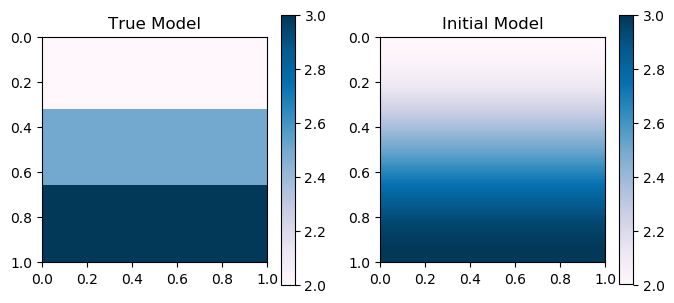

In [1]:
using JLD2, PyPlot;
include("forward_modelling.jl");
@load "three_data.jld2";
@load "data/three_layers.jld2" vel_true vel_init acq_fre;

x = linspace(0,1,101); y = linspace(0,1,101);
fig = figure("Model", figsize=(8,3.5))
ax = fig[:add_subplot](1,2,1)
pcolormesh(x,y,vel_true',cmap="PuBu"); colorbar(); title("True Model"); axis("scaled");
gca()[:invert_yaxis]()
ax = fig[:add_subplot](1,2,2)
pcolormesh(x,y,vel_init',cmap="PuBu"); colorbar(); title("Initial Model"); axis("scaled");
gca()[:invert_yaxis]()

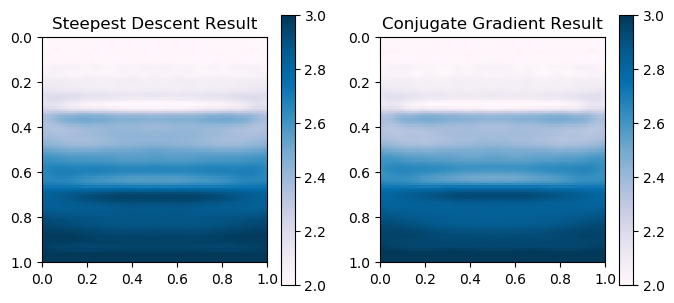

In [3]:
fig = figure("Model", figsize=(8,3.5))
ax = fig[:add_subplot](1,2,1)
pcolormesh(x,y,vel_sg',cmap="PuBu"); colorbar(); title("Steepest Descent Result"); axis("scaled");
gca()[:invert_yaxis]()
ax = fig[:add_subplot](1,2,2)
pcolormesh(x,y,vel_cg',cmap="PuBu"); colorbar(); title("Conjugate Gradient Result"); axis("scaled");
gca()[:invert_yaxis]()

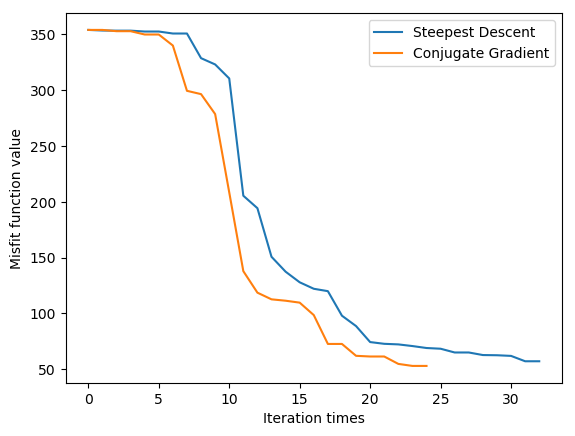

PyObject <matplotlib.legend.Legend object at 0x14cc71a10>

In [4]:
fig = figure("Misfit func")
plot(mis_sg); plot(mis_cg);
xlabel("Iteration times"); ylabel("Misfit function value");
legend(["Steepest Descent","Conjugate Gradient"])

## Overthrust Model

- Grid size: $401\times131$, with step size 25 (m),
- Source term: 10 Hz Ricker wavelet
- Frequency used: 1 3 5 7 9 11 13 15 Hz
- Source: 81 sources, on second line, space 125 (m)
- Receiver: 401 receivers, on second line, space 25 (m)

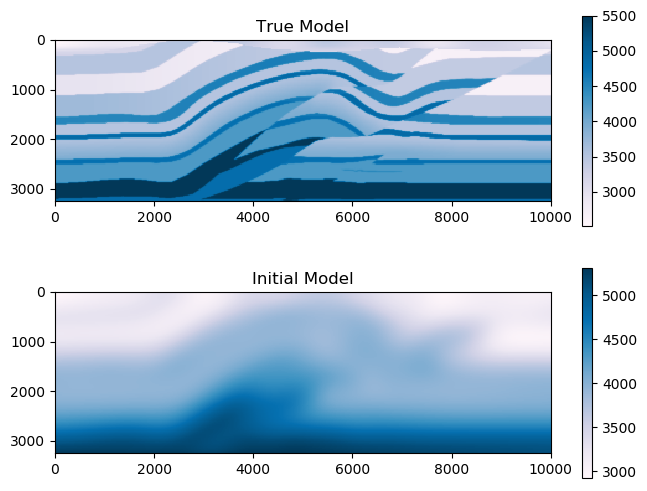

In [9]:
# @load "result_sd.jld2"
# @load "result_cg.jld2"
@load "data/overthrust_small.jld2" vel_true vel_init conf

h = conf.h; Nx = conf.Nx; Ny = conf.Ny;
x = linspace(0,(Nx-1)*h,Nx);
y = linspace(0,(Ny-1)*h,Ny);

fig = figure("Model", figsize=(8,6))
ax = fig[:add_subplot](2,1,1)
pcolormesh(x,y,vel_true',cmap="PuBu"); colorbar(); title("True Model"); axis("scaled");
gca()[:invert_yaxis]()
ax = fig[:add_subplot](2,1,2)
pcolormesh(x,y,vel_init',cmap="PuBu"); colorbar(); title("Initial Model"); axis("scaled");
gca()[:invert_yaxis]()

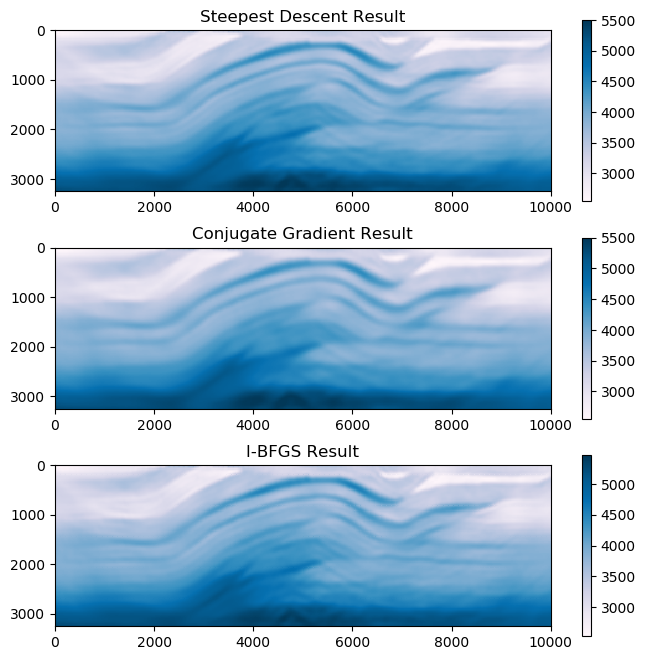

In [14]:
@load "result_sd.jld2"
fig = figure("Model", figsize=(8,8))
ax = fig[:add_subplot](3,1,1)
pcolormesh(x,y,reshape(vel_new,Nx,Ny)',cmap="PuBu"); colorbar(); title("Steepest Descent Result"); axis("scaled");
gca()[:invert_yaxis]()
@load "result_cg.jld2"
ax = fig[:add_subplot](3,1,2)
pcolormesh(x,y,reshape(vel_new,Nx,Ny)',cmap="PuBu"); colorbar(); title("Conjugate Gradient Result"); axis("scaled");
gca()[:invert_yaxis]()
@load "result_lbfgs.jld2"
ax = fig[:add_subplot](3,1,3)
pcolormesh(x,y,reshape(vel_new,Nx,Ny)',cmap="PuBu"); colorbar(); title("l-BFGS Result"); axis("scaled");
gca()[:invert_yaxis]()